In [1]:
# mounting the drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 3  # Change this value as needed

In [3]:
cal = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal rojo/No source.txt'

df_cal = pd.read_table(cal, decimal=',')

df_cal.columns = ['Threshold - No Scintillator', 'Frequency - No Scintillator', 'Threshold - With Scintillator', 'Frequency - With Scintillator']

# Processing for the radioactive samples

cAm1 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal rojo/Am 1.txt'
cAm2 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal rojo/Am 2.txt'
cAm3 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal rojo/Am 3.txt'

cNa = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Calibration Data/Na thrershold calibration/red crystal.txt'


cCs1 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal rojo/Cs 1.txt'
cCs2 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal rojo/Cs 2.txt'
cCs3 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal rojo/Cs 3.txt'

df_cAm1 = pd.read_table(cAm1, decimal=',')
df_cAm2 = pd.read_table(cAm2, decimal=',')
df_cAm3 = pd.read_table(cAm3, decimal=',')

df_cNa = pd.read_table(cNa, decimal=',')

df_cCs1 = pd.read_table(cCs1, decimal=',')
df_cCs2 = pd.read_table(cCs2, decimal=',')
df_cCs3 = pd.read_table(cCs3, decimal=',')

df_cAm = [df_cAm1, df_cAm2, df_cAm3]
df_cNa = [df_cNa]
df_cCs = [df_cCs1, df_cCs2, df_cCs3]

for i in df_cAm:
    i.drop(i.columns[[0, 1, 2, 3]], axis=1, inplace=True)
    i.columns = ['Threshold', 'Frequency']

for i in df_cNa:
    i.drop(i.columns[[0, 1, 2, 3]], axis=1, inplace=True)
    i.columns = ['Threshold', 'Frequency']

for i in df_cCs:
    i.drop(i.columns[[0, 1, 2, 3]], axis=1, inplace=True)
    i.columns = ['Threshold', 'Frequency']


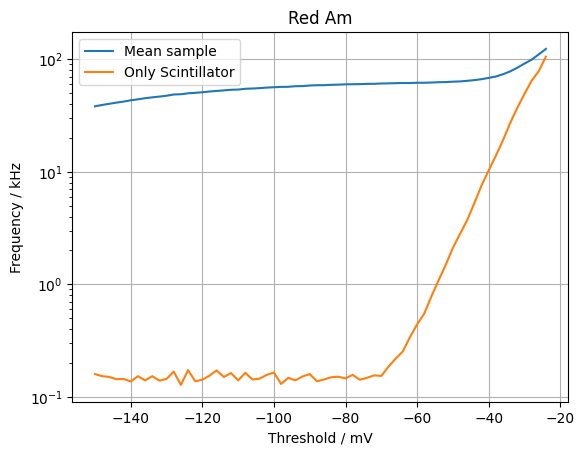

In [12]:
# Checking if all the trials are good and generating the mean result

# for i, df in enumerate(df_cAm, start=1):
#     plt.semilogy(df['Threshold'], df['Frequency'], label=f'Trial {i}')

plt.title('Red Am')
plt.xlabel('Threshold / mV')
plt.ylabel('Frequency / kHz')

mean_df_cAm = pd.concat(df_cAm).groupby(level=0).mean()

plt.semilogy(mean_df_cAm['Threshold'], mean_df_cAm['Frequency'], label=f'Mean sample')

# Plotting the calibration measurements
plt.semilogy(df_cal['Threshold - With Scintillator'], df_cal['Frequency - With Scintillator'], label='Only Scintillator')

plt.grid()
plt.legend()

plt.savefig('/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/New_Graphs/Red Am.png', dpi=300, bbox_inches='tight')

plt.show()


In [5]:
#Threshold -40
a = df_cAm[1]['Frequency'][28]
b = df_cal['Frequency - With Scintillator'][28]
c = df_cAm[1]['Threshold'][28]

print( c , a ,b, f'SNR is {round(a/b, 0)}')


-80 59.8533 0.145833 SNR is 410.0


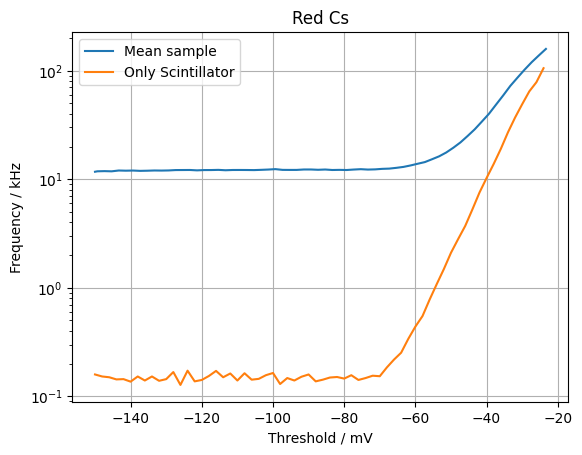

In [14]:
# Checking if all the trials are good and generating the mean result

# for i, df in enumerate(df_cAm, start=1):
#     plt.semilogy(df['Threshold'], df['Frequency'], label=f'Trial {i}')

plt.title('Red Cs')
plt.xlabel('Threshold / mV')
plt.ylabel('Frequency / kHz')

mean_df_cCs = pd.concat(df_cCs).groupby(level=0).mean()

plt.semilogy(mean_df_cCs['Threshold'], mean_df_cCs['Frequency'], label=f'Mean sample')

# Plotting the calibration measurements
plt.semilogy(df_cal['Threshold - With Scintillator'], df_cal['Frequency - With Scintillator'], label='Only Scintillator')

plt.grid()
plt.legend()

plt.savefig('/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/New_Graphs/Red Cs.png', dpi=300, bbox_inches='tight')

plt.show()


In [7]:
#Threshold -40
a = mean_df_cCs['Frequency'][19]
b = df_cal['Frequency - With Scintillator'][19]
c = mean_df_cCs['Threshold'][19]

print( c , a ,b, f'SNR is {round(a/b, 0)}')


-61.333333333333336 13.399433333333333 0.338333 SNR is 40.0


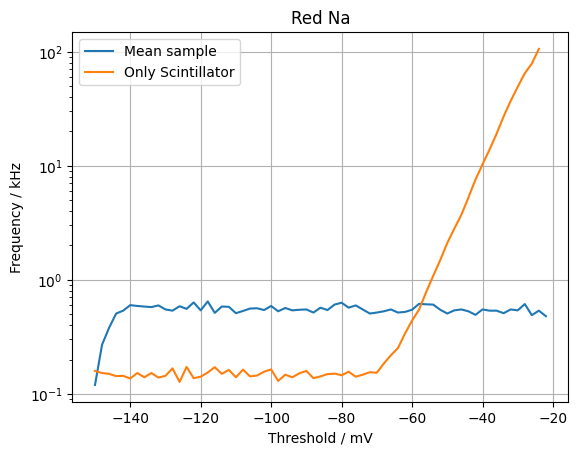

In [15]:
# Checking if all the trials are good and generating the mean result

# for i, df in enumerate(df_cAm, start=1):
#     plt.semilogy(df['Threshold'], df['Frequency'], label=f'Trial {i}')

plt.title('Red Na')
plt.xlabel('Threshold / mV')
plt.ylabel('Frequency / kHz')

mean_df_cNa = pd.concat(df_cNa).groupby(level=0).mean()

plt.semilogy(mean_df_cNa['Threshold'], mean_df_cNa['Frequency'], label=f'Mean sample')

# Plotting the calibration measurements
plt.semilogy(df_cal['Threshold - With Scintillator'], df_cal['Frequency - With Scintillator'], label='Only Scintillator')

plt.grid()
plt.legend()
plt.savefig('/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/New_Graphs/Red Na.png', dpi=300, bbox_inches='tight')


plt.show()


In [9]:
#Threshold -50
a = mean_df_cNa['Frequency'][29]
b = df_cal['Frequency - With Scintillator'][29]
c = mean_df_cNa['Threshold'][29]

print( c , a ,b, f'SNR is {round(a/b, 5)}')


-80.0 0.63 0.150833 SNR is 4.1768
